# Notebook 00: Data Overview + Validation + Exploratory Data Analysis

**Project:** Vehicle Sales & Market Insights  
**Dataset:** car_prices.csv   

---

## Objective
This notebook performs comprehensive initial data exploration including:
- Data loading and structure validation
- Missing value analysis
- Descriptive statistics
- Visual EDA (distributions, correlations, trends)
- Data validation checks
- Export of interim cleaned dataset

---

## Step 1: Environment Setup
Import essential libraries and configure display settings for optimal analysis.

In [1]:
# ==============================================================================
# IMPORTS & CONFIGURATION
# ==============================================================================

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Statistics
from scipy import stats
from scipy.stats import skew, kurtosis

# Utilities
import warnings
from datetime import datetime
import os

# Display configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', None)

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Create directory structure
os.makedirs('data/interim', exist_ok=True)
os.makedirs('data/processed', exist_ok=True)
os.makedirs('models/preprocessing', exist_ok=True)
os.makedirs('models/final', exist_ok=True)
os.makedirs('artifacts/explainability', exist_ok=True)
os.makedirs('app/artifacts', exist_ok=True)
os.makedirs('monitoring', exist_ok=True)

print("=" * 70)
print("NOTEBOOK 00: DATA OVERVIEW + VALIDATION + EDA")
print("=" * 70)
print(f"✓ Libraries imported successfully")
print(f"✓ Display settings configured")
print(f"✓ Directory structure created")
print(f"✓ Environment ready for analysis")
print("=" * 70)

NOTEBOOK 00: DATA OVERVIEW + VALIDATION + EDA
✓ Libraries imported successfully
✓ Display settings configured
✓ Directory structure created
✓ Environment ready for analysis


## Step 2: Load Raw Dataset

Load the car_prices.csv dataset and perform initial structure inspection.
We'll examine the first few rows, column names, data types, and basic shape information.

In [2]:
# Load raw dataset
df_raw = pd.read_csv('car_prices.csv')

# Basic structure
print("Dataset Shape:", df_raw.shape)
print("\nColumn Names and Types:")
print(df_raw.dtypes)
print("\nFirst 5 Rows:")
display(df_raw.head())
print("\nDataset Info:")
df_raw.info()

Dataset Shape: (558837, 16)

Column Names and Types:
year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

First 5 Rows:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.00,16639.00,white,black,kia motors america inc,20500.00,21500.00,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.00,9393.00,white,beige,kia motors america inc,20800.00,21500.00,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.00,1331.00,gray,black,financial services remarketing (lease),31900.00,30000.00,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.00,14282.00,white,black,volvo na rep/world omni,27500.00,27750.00,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.00,2641.00,gray,black,financial services remarketing (lease),66000.00,67000.00,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


## Step 3: Missing Values Analysis

Quantify missing data across all columns to understand data quality issues.
This will inform our cleaning strategy in Notebook 01.

Missing Values Summary:
          Column  Missing_Count  Missing_Percentage
0   transmission          65352               11.69
1           body          13195                2.36
2      condition          11820                2.12
3           trim          10651                1.91
4          model          10399                1.86
5           make          10301                1.84
6          color            749                0.13
7       interior            749                0.13
8       odometer             94                0.02
9            mmr             38                0.01
10           vin              4                0.00
11  sellingprice             12                0.00
12      saledate             12                0.00


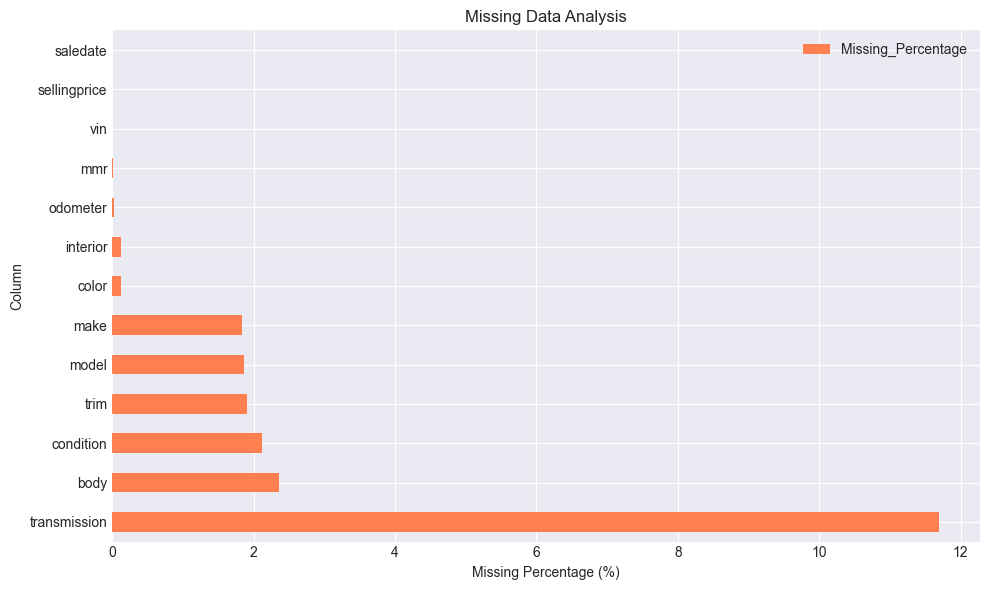


Total columns with missing data: 13
Overall data completeness: 98.62%


In [3]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df_raw.columns,
    'Missing_Count': df_raw.isnull().sum(),
    'Missing_Percentage': (df_raw.isnull().sum() / len(df_raw) * 100).round(2)
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
).reset_index(drop=True)

print("Missing Values Summary:")
print(missing_data)

# Visual representation
fig, ax = plt.subplots(figsize=(10, 6))
missing_data.plot(x='Column', y='Missing_Percentage', kind='barh', ax=ax, color='coral')
ax.set_xlabel('Missing Percentage (%)')
ax.set_ylabel('Column')
ax.set_title('Missing Data Analysis')
plt.tight_layout()
plt.show()

print(f"\nTotal columns with missing data: {len(missing_data)}")
print(f"Overall data completeness: {((1 - df_raw.isnull().sum().sum() / (len(df_raw) * len(df_raw.columns))) * 100):.2f}%")

## Step 4: Descriptive Statistics

Examine numerical features to understand value ranges, distributions, and potential outliers.
Focus on key variables: year, condition, odometer, mmr, and sellingprice.

In [4]:
# Descriptive statistics for numerical columns
numerical_cols = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

desc_stats = df_raw[numerical_cols].describe()
print("Descriptive Statistics:")
print(desc_stats)

# Additional statistics
print("\nAdditional Distribution Metrics:")
additional_stats = pd.DataFrame({
    'Column': numerical_cols,
    'Skewness': [df_raw[col].skew() for col in numerical_cols],
    'Kurtosis': [df_raw[col].kurtosis() for col in numerical_cols],
    'Range': [df_raw[col].max() - df_raw[col].min() for col in numerical_cols]
})
print(additional_stats)

# Check for potential data quality issues
print("\nData Quality Checks:")
print(f"Negative odometer values: {(df_raw['odometer'] < 0).sum()}")
print(f"Negative prices: {(df_raw['sellingprice'] < 0).sum()}")
print(f"Zero prices: {(df_raw['sellingprice'] == 0).sum()}")
print(f"Condition outside [1-5]: {((df_raw['condition'] < 1) | (df_raw['condition'] > 5)).sum()}")

Descriptive Statistics:
           year  condition  odometer       mmr  sellingprice
count 558837.00  547017.00 558743.00 558799.00     558825.00
mean    2010.04      30.67  68320.02  13769.38      13611.36
std        3.97      13.40  53398.54   9679.97       9749.50
min     1982.00       1.00      1.00     25.00          1.00
25%     2007.00      23.00  28371.00   7100.00       6900.00
50%     2012.00      35.00  52254.00  12250.00      12100.00
75%     2013.00      42.00  99109.00  18300.00      18200.00
max     2015.00      49.00 999999.00 182000.00     230000.00

Additional Distribution Metrics:
         Column  Skewness  Kurtosis     Range
0          year     -1.18      1.01     33.00
1     condition     -0.83     -0.22     48.00
2      odometer      1.84     13.55 999998.00
3           mmr      2.00     11.44 181975.00
4  sellingprice      1.95     11.11 229999.00

Data Quality Checks:
Negative odometer values: 0
Negative prices: 0
Zero prices: 0
Condition outside [1-5]: 476916


## Step 5: Date Parsing and Temporal Features

Convert saledate to datetime format and extract temporal features for time-series analysis.
Create derived features: year, month, day of week, and vehicle age at sale.

In [6]:
# Parse saledate - handle the specific format
df_raw['saledate'] = pd.to_datetime(df_raw['saledate'], errors='coerce')

# Check how many successfully parsed
successful_parse = df_raw['saledate'].notna().sum()
failed_parse = df_raw['saledate'].isna().sum()

print(f"Successfully parsed dates: {successful_parse}")
print(f"Failed to parse: {failed_parse}")

# Only proceed with temporal features if we have valid dates
if successful_parse > 0:
    # Extract temporal features only for non-null dates
    df_raw['sale_year'] = df_raw['saledate'].dt.year
    df_raw['sale_month'] = df_raw['saledate'].dt.month
    df_raw['sale_day'] = df_raw['saledate'].dt.day
    df_raw['sale_dayofweek'] = df_raw['saledate'].dt.dayofweek
    df_raw['sale_quarter'] = df_raw['saledate'].dt.quarter
    
    # Calculate vehicle age at time of sale
    df_raw['vehicle_age'] = df_raw['sale_year'] - df_raw['year']
    
    # Summary
    print("\nDate Parsing Results:")
    print(f"Date range: {df_raw['saledate'].min()} to {df_raw['saledate'].max()}")
    print("\nTemporal Features Created:")
    print(df_raw[['saledate', 'sale_year', 'sale_month', 'sale_quarter', 'vehicle_age']].head(10))
    print("\nVehicle Age Statistics:")
    print(df_raw['vehicle_age'].describe())
else:
    print("\nNo valid dates found. Checking sample of original saledate values:")
    print(df_raw['saledate'].head(10))

Successfully parsed dates: 395489
Failed to parse: 163348

Date Parsing Results:
Date range: 2014-01-01 09:15:00+08:00 to 2015-03-06 07:00:00+08:00

Temporal Features Created:
                   saledate  sale_year  sale_month  sale_quarter  vehicle_age
0 2014-12-16 12:30:00+08:00    2014.00       12.00          4.00        -1.00
1 2014-12-16 12:30:00+08:00    2014.00       12.00          4.00        -1.00
2 2015-01-15 04:30:00+08:00    2015.00        1.00          1.00         1.00
3 2015-01-29 04:30:00+08:00    2015.00        1.00          1.00         0.00
4 2014-12-18 12:30:00+08:00    2014.00       12.00          4.00         0.00
5 2014-12-30 12:00:00+08:00    2014.00       12.00          4.00        -1.00
6 2014-12-17 12:30:00+08:00    2014.00       12.00          4.00         0.00
7 2014-12-16 13:00:00+08:00    2014.00       12.00          4.00         0.00
8 2014-12-18 12:00:00+08:00    2014.00       12.00          4.00         0.00
9 2015-01-20 04:00:00+08:00    2015.00      

## Step 6: Categorical Variables Analysis

Examine the distribution and cardinality of categorical features.
Identify top categories and potential data quality issues in text fields.

In [7]:
# Analyze categorical columns
categorical_cols = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']

print("Categorical Variables Summary:")
cat_summary = pd.DataFrame({
    'Column': categorical_cols,
    'Unique_Values': [df_raw[col].nunique() for col in categorical_cols],
    'Most_Common': [df_raw[col].mode()[0] if len(df_raw[col].mode()) > 0 else 'N/A' for col in categorical_cols],
    'Most_Common_Count': [df_raw[col].value_counts().iloc[0] if len(df_raw[col]) > 0 else 0 for col in categorical_cols],
    'Most_Common_Pct': [(df_raw[col].value_counts().iloc[0] / len(df_raw) * 100) if len(df_raw[col]) > 0 else 0 for col in categorical_cols]
})
print(cat_summary)

# Top 10 values for key categorical variables
print("\n" + "="*60)
print("Top 10 Makes:")
print(df_raw['make'].value_counts().head(10))

print("\n" + "="*60)
print("Top 10 States:")
print(df_raw['state'].value_counts().head(10))

print("\n" + "="*60)
print("Body Types:")
print(df_raw['body'].value_counts())

print("\n" + "="*60)
print("Transmission Types:")
print(df_raw['transmission'].value_counts())

Categorical Variables Summary:
         Column  Unique_Values         Most_Common  Most_Common_Count  \
0          make             96                Ford              93554   
1         model            973              Altima              19349   
2          trim           1963                Base              55817   
3          body             87               Sedan             199437   
4  transmission              4           automatic             475915   
5         state             64                  fl              82945   
6         color             46               black             110970   
7      interior             17               black             244329   
8        seller          14263  nissan-infiniti lt              19693   

   Most_Common_Pct  
0            16.74  
1             3.46  
2             9.99  
3            35.69  
4            85.16  
5            14.84  
6            19.86  
7            43.72  
8             3.52  

Top 10 Makes:
make
Ford    

## Step 7: Data Validation Tests

Perform systematic data quality checks to identify issues that require cleaning.
This includes range validation, consistency checks, and anomaly detection.

In [8]:
# Data validation tests
validation_results = []

# Test 1: Year range validation
year_issues = ((df_raw['year'] < 1980) | (df_raw['year'] > 2016)).sum()
validation_results.append(('Year Range (1980-2016)', year_issues, 'PASS' if year_issues == 0 else 'FAIL'))

# Test 2: Odometer reasonable range
odo_issues = ((df_raw['odometer'] > 500000) | (df_raw['odometer'] < 1)).sum()
validation_results.append(('Odometer Range (1-500k)', odo_issues, 'WARN' if odo_issues > 0 else 'PASS'))

# Test 3: Price consistency (selling price vs mmr)
price_diff = (df_raw['sellingprice'] - df_raw['mmr']).abs()
extreme_diff = (price_diff > 50000).sum()
validation_results.append(('Price vs MMR deviation >50k', extreme_diff, 'WARN' if extreme_diff > 0 else 'PASS'))

# Test 4: Negative vehicle age
neg_age = (df_raw['vehicle_age'] < -2).sum()
validation_results.append(('Vehicle Age <-2 years', neg_age, 'WARN' if neg_age > 0 else 'PASS'))

# Test 5: Duplicate VINs
dup_vins = df_raw['vin'].duplicated().sum()
validation_results.append(('Duplicate VINs', dup_vins, 'WARN' if dup_vins > 1000 else 'PASS'))

# Test 6: Case inconsistency in body type
body_case_issues = df_raw['body'].value_counts()
body_variations = len([b for b in body_case_issues.index if isinstance(b, str) and 
                       any(b.lower() == other.lower() and b != other 
                           for other in body_case_issues.index if isinstance(other, str))])
validation_results.append(('Body Type Case Inconsistency', body_variations, 'FAIL' if body_variations > 0 else 'PASS'))

# Test 7: Invalid transmission values
invalid_trans = df_raw[~df_raw['transmission'].isin(['automatic', 'manual'])]['transmission'].notna().sum()
validation_results.append(('Invalid Transmission Values', invalid_trans, 'FAIL' if invalid_trans > 0 else 'PASS'))

# Display results
validation_df = pd.DataFrame(validation_results, columns=['Test', 'Issues_Found', 'Status'])
print("Data Validation Results:")
print(validation_df)

# Summary statistics
print(f"\nValidation Summary:")
print(f"Tests Passed: {(validation_df['Status'] == 'PASS').sum()}")
print(f"Tests with Warnings: {(validation_df['Status'] == 'WARN').sum()}")
print(f"Tests Failed: {(validation_df['Status'] == 'FAIL').sum()}")

Data Validation Results:
                           Test  Issues_Found Status
0        Year Range (1980-2016)             0   PASS
1       Odometer Range (1-500k)            81   WARN
2   Price vs MMR deviation >50k             7   WARN
3         Vehicle Age <-2 years             0   PASS
4                Duplicate VINs          8539   WARN
5  Body Type Case Inconsistency            82   FAIL
6   Invalid Transmission Values            26   FAIL

Validation Summary:
Tests Passed: 2
Tests with Warnings: 3
Tests Failed: 2


## Step 8: Price Distribution Analysis

Visualize the distribution of selling price and MMR (Manheim Market Report value).
Examine the relationship between these two key variables and identify outliers.

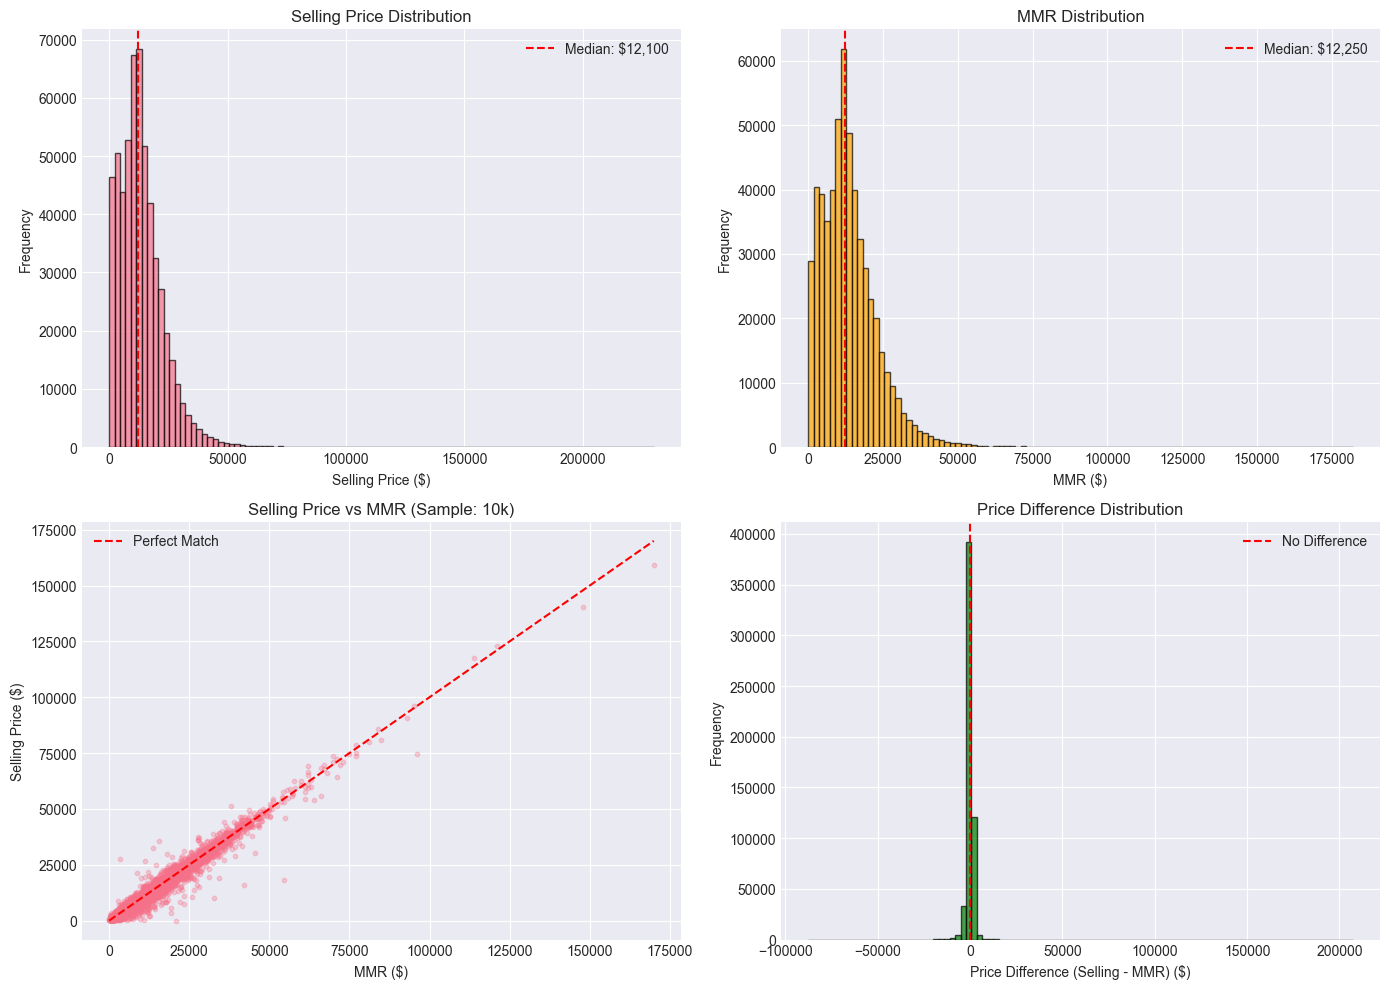

Price Analysis Summary:
Selling Price - Mean: $13,611.36, Median: $12,100.00
MMR - Mean: $13,769.38, Median: $12,250.00
Price Difference - Mean: $-158.02, Median: $-50.00
Correlation (Selling Price vs MMR): 0.9836


In [9]:
# Create subplots for price analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Selling Price Distribution
axes[0, 0].hist(df_raw['sellingprice'].dropna(), bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Selling Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Selling Price Distribution')
axes[0, 0].axvline(df_raw['sellingprice'].median(), color='red', linestyle='--', label=f"Median: ${df_raw['sellingprice'].median():,.0f}")
axes[0, 0].legend()

# MMR Distribution
axes[0, 1].hist(df_raw['mmr'].dropna(), bins=100, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('MMR ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('MMR Distribution')
axes[0, 1].axvline(df_raw['mmr'].median(), color='red', linestyle='--', label=f"Median: ${df_raw['mmr'].median():,.0f}")
axes[0, 1].legend()

# Selling Price vs MMR Scatter
sample_data = df_raw[['sellingprice', 'mmr']].dropna().sample(min(10000, len(df_raw)))
axes[1, 0].scatter(sample_data['mmr'], sample_data['sellingprice'], alpha=0.3, s=10)
axes[1, 0].plot([0, sample_data['mmr'].max()], [0, sample_data['mmr'].max()], 'r--', label='Perfect Match')
axes[1, 0].set_xlabel('MMR ($)')
axes[1, 0].set_ylabel('Selling Price ($)')
axes[1, 0].set_title('Selling Price vs MMR (Sample: 10k)')
axes[1, 0].legend()

# Price Difference Distribution
df_raw['price_diff'] = df_raw['sellingprice'] - df_raw['mmr']
axes[1, 1].hist(df_raw['price_diff'].dropna(), bins=100, edgecolor='black', alpha=0.7, color='green')
axes[1, 1].set_xlabel('Price Difference (Selling - MMR) ($)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Price Difference Distribution')
axes[1, 1].axvline(0, color='red', linestyle='--', label='No Difference')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Summary statistics
print("Price Analysis Summary:")
print(f"Selling Price - Mean: ${df_raw['sellingprice'].mean():,.2f}, Median: ${df_raw['sellingprice'].median():,.2f}")
print(f"MMR - Mean: ${df_raw['mmr'].mean():,.2f}, Median: ${df_raw['mmr'].median():,.2f}")
print(f"Price Difference - Mean: ${df_raw['price_diff'].mean():,.2f}, Median: ${df_raw['price_diff'].median():,.2f}")
print(f"Correlation (Selling Price vs MMR): {df_raw[['sellingprice', 'mmr']].corr().iloc[0, 1]:.4f}")

## Step 9: Odometer Analysis

Examine odometer readings distribution and relationship to vehicle price.
High mileage is a key depreciation factor and potential source of outliers.

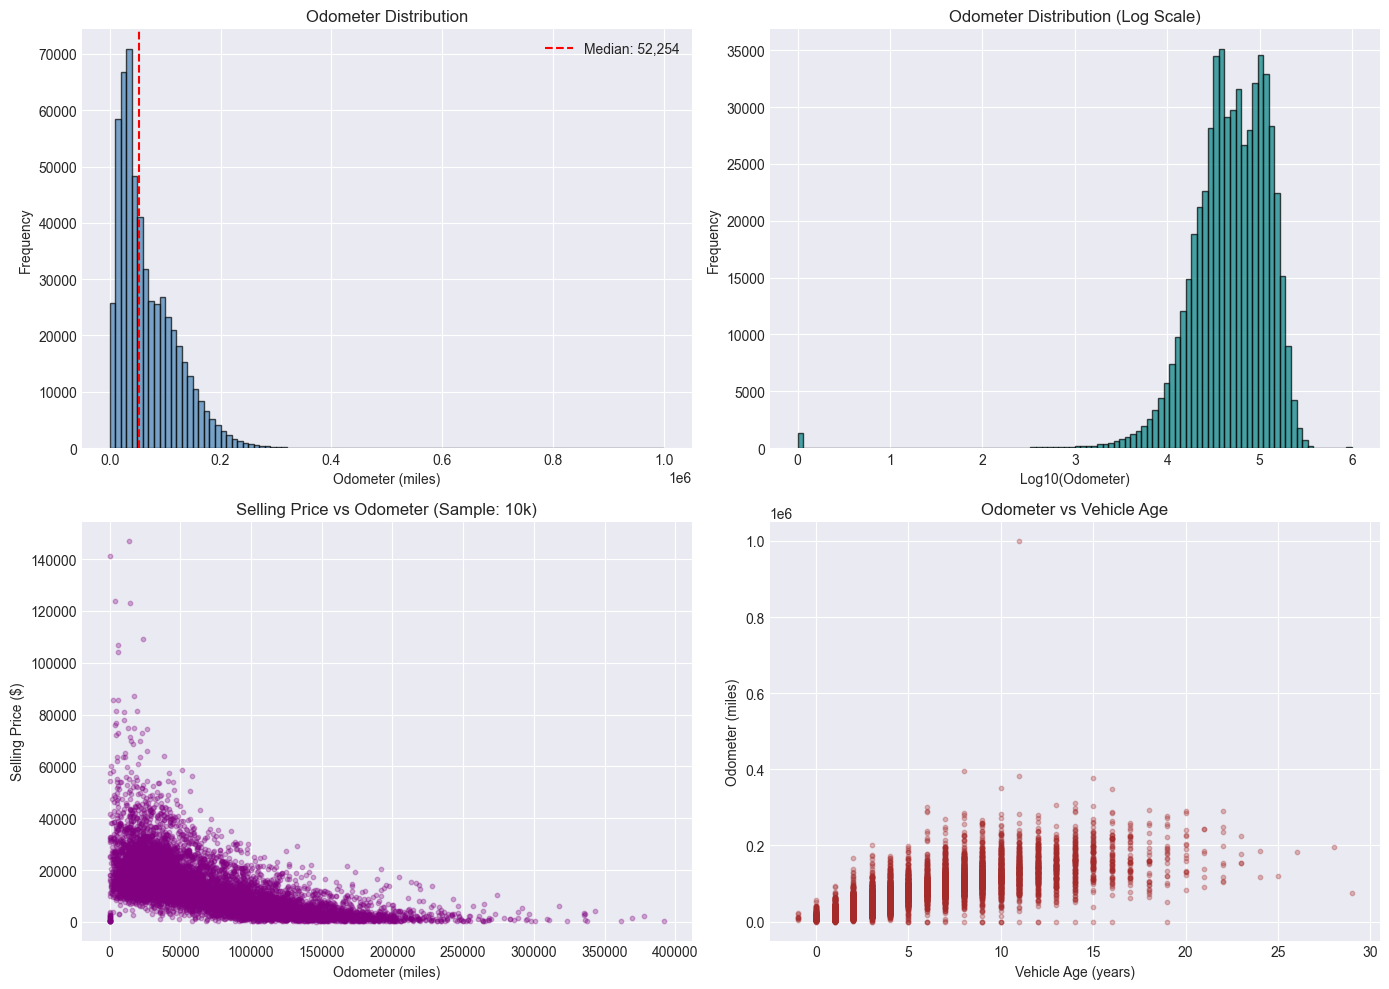

Odometer Statistics:
count   558743.00
mean     68320.02
std      53398.54
min          1.00
25%      28371.00
50%      52254.00
75%      99109.00
max     999999.00
Name: odometer, dtype: float64

Outlier Analysis:
Vehicles with >200k miles: 12111 (2.17%)
Vehicles with >500k miles: 81
Correlation (Odometer vs Selling Price): -0.5824


In [10]:
# Odometer analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Odometer distribution
axes[0, 0].hist(df_raw['odometer'].dropna(), bins=100, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Odometer (miles)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Odometer Distribution')
axes[0, 0].axvline(df_raw['odometer'].median(), color='red', linestyle='--', label=f"Median: {df_raw['odometer'].median():,.0f}")
axes[0, 0].legend()

# Log-scale odometer
odo_positive = df_raw[df_raw['odometer'] > 0]['odometer']
axes[0, 1].hist(np.log10(odo_positive), bins=100, edgecolor='black', alpha=0.7, color='teal')
axes[0, 1].set_xlabel('Log10(Odometer)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Odometer Distribution (Log Scale)')

# Odometer vs Selling Price
sample_data = df_raw[['odometer', 'sellingprice']].dropna().sample(min(10000, len(df_raw)))
axes[1, 0].scatter(sample_data['odometer'], sample_data['sellingprice'], alpha=0.3, s=10, color='purple')
axes[1, 0].set_xlabel('Odometer (miles)')
axes[1, 0].set_ylabel('Selling Price ($)')
axes[1, 0].set_title('Selling Price vs Odometer (Sample: 10k)')

# Odometer by vehicle age
sample_data_age = df_raw[['vehicle_age', 'odometer']].dropna().sample(min(10000, len(df_raw)))
axes[1, 1].scatter(sample_data_age['vehicle_age'], sample_data_age['odometer'], alpha=0.3, s=10, color='brown')
axes[1, 1].set_xlabel('Vehicle Age (years)')
axes[1, 1].set_ylabel('Odometer (miles)')
axes[1, 1].set_title('Odometer vs Vehicle Age')

plt.tight_layout()
plt.show()

# Statistics
print("Odometer Statistics:")
print(df_raw['odometer'].describe())
print(f"\nOutlier Analysis:")
print(f"Vehicles with >200k miles: {(df_raw['odometer'] > 200000).sum()} ({(df_raw['odometer'] > 200000).sum() / len(df_raw) * 100:.2f}%)")
print(f"Vehicles with >500k miles: {(df_raw['odometer'] > 500000).sum()}")
print(f"Correlation (Odometer vs Selling Price): {df_raw[['odometer', 'sellingprice']].corr().iloc[0, 1]:.4f}")

## Step 10: Top Makes and Models Analysis

Analyze the distribution of vehicle makes and models by volume and average price.
Identify premium vs economy brands and high-volume segments.

Top 15 Makes by Volume:
               Count  Avg_Price  Median_Price  Avg_MMR  Avg_Odometer
make                                                                
Ford           93553   14540.00      13500.00 14734.00      63507.00
Chevrolet      60197   11977.00      10500.00 12151.00      76896.00
Nissan         53946   11739.00      12000.00 11867.00      56219.00
Toyota         39871   12249.00      12100.00 12359.00      73971.00
Dodge          30708   11207.00      10500.00 11417.00      72498.00
Honda          27206   10940.00      11000.00 11002.00      80332.00
Hyundai        21811   11011.00      11400.00 11232.00      51175.00
BMW            20719   21442.00      20100.00 21576.00      64298.00
Kia            18075   11809.00      12200.00 11947.00      46014.00
Chrysler       17274   11167.00      10300.00 11416.00      65528.00
Mercedes-Benz  17141   21591.00      21000.00 21940.00      62415.00
Jeep           15372   15000.00      13900.00 15118.00      69804.00
Infiniti  

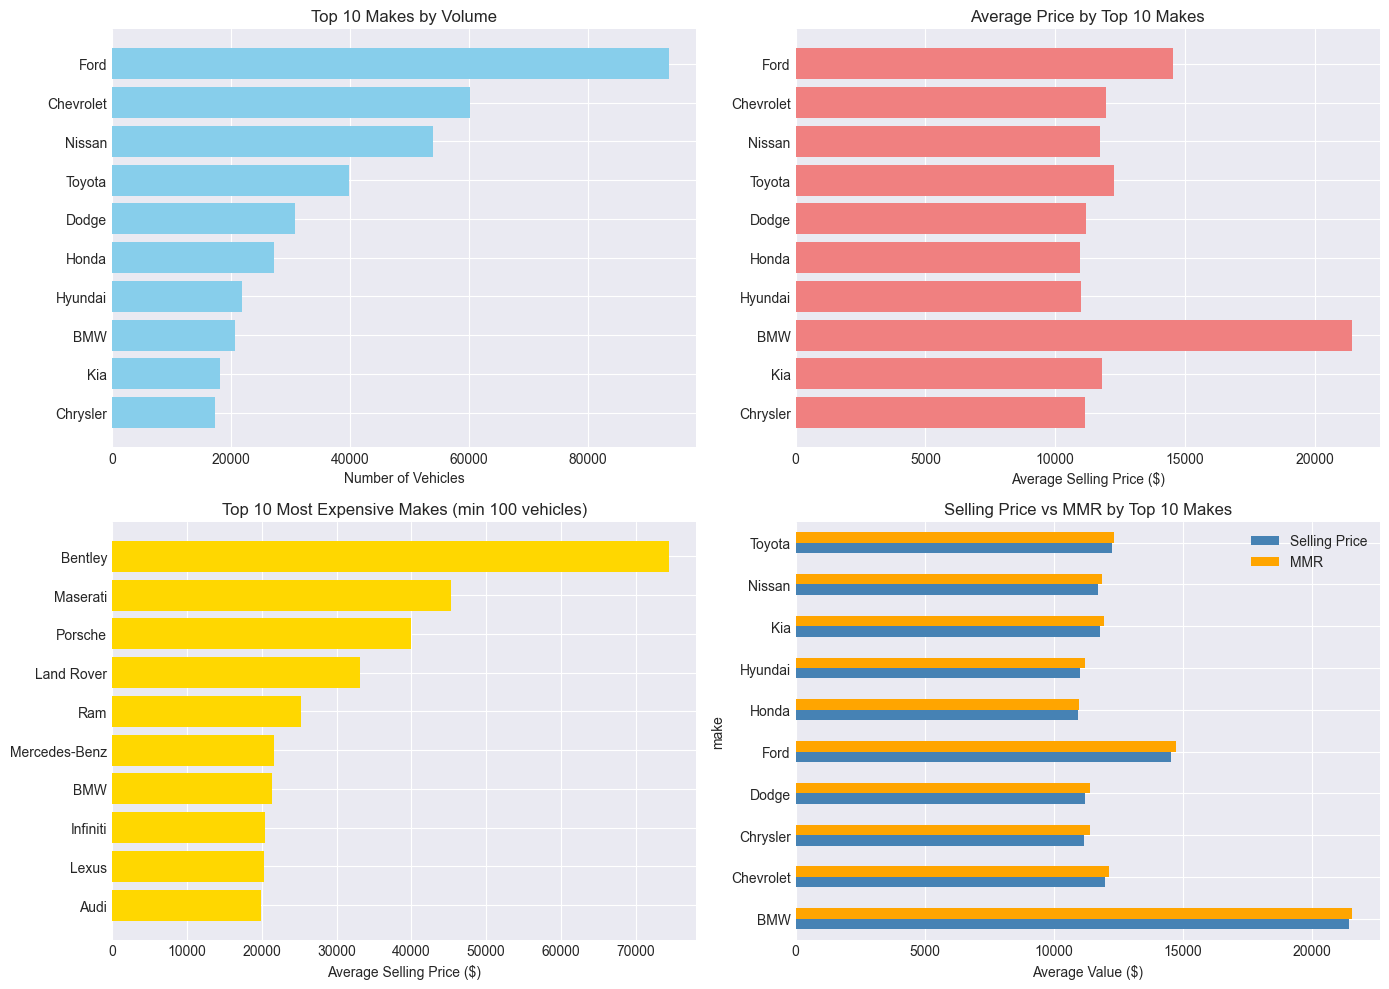

In [11]:
# Top makes by volume and average price
make_analysis = df_raw.groupby('make').agg({
    'sellingprice': ['count', 'mean', 'median'],
    'mmr': 'mean',
    'odometer': 'mean'
}).round(0)
make_analysis.columns = ['Count', 'Avg_Price', 'Median_Price', 'Avg_MMR', 'Avg_Odometer']
make_analysis = make_analysis.sort_values('Count', ascending=False)

print("Top 15 Makes by Volume:")
print(make_analysis.head(15))

# Visualize top 10 makes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Volume
top_10_makes = make_analysis.head(10)
axes[0, 0].barh(range(len(top_10_makes)), top_10_makes['Count'], color='skyblue')
axes[0, 0].set_yticks(range(len(top_10_makes)))
axes[0, 0].set_yticklabels(top_10_makes.index)
axes[0, 0].set_xlabel('Number of Vehicles')
axes[0, 0].set_title('Top 10 Makes by Volume')
axes[0, 0].invert_yaxis()

# Average price by top 10 makes
axes[0, 1].barh(range(len(top_10_makes)), top_10_makes['Avg_Price'], color='lightcoral')
axes[0, 1].set_yticks(range(len(top_10_makes)))
axes[0, 1].set_yticklabels(top_10_makes.index)
axes[0, 1].set_xlabel('Average Selling Price ($)')
axes[0, 1].set_title('Average Price by Top 10 Makes')
axes[0, 1].invert_yaxis()

# Top 10 most expensive makes
expensive_makes = make_analysis[make_analysis['Count'] > 100].sort_values('Avg_Price', ascending=False).head(10)
axes[1, 0].barh(range(len(expensive_makes)), expensive_makes['Avg_Price'], color='gold')
axes[1, 0].set_yticks(range(len(expensive_makes)))
axes[1, 0].set_yticklabels(expensive_makes.index)
axes[1, 0].set_xlabel('Average Selling Price ($)')
axes[1, 0].set_title('Top 10 Most Expensive Makes (min 100 vehicles)')
axes[1, 0].invert_yaxis()

# Price vs MMR by make
top_makes_sample = df_raw[df_raw['make'].isin(top_10_makes.index)][['make', 'sellingprice', 'mmr']].dropna()
make_price_comparison = top_makes_sample.groupby('make')[['sellingprice', 'mmr']].mean()
make_price_comparison.plot(kind='barh', ax=axes[1, 1], color=['steelblue', 'orange'])
axes[1, 1].set_xlabel('Average Value ($)')
axes[1, 1].set_title('Selling Price vs MMR by Top 10 Makes')
axes[1, 1].legend(['Selling Price', 'MMR'])

plt.tight_layout()
plt.show()

## Step 11: Correlation Analysis

Examine correlations between numeric features to identify relationships and potential multicollinearity.
This will guide feature selection and engineering in the preprocessing pipeline.

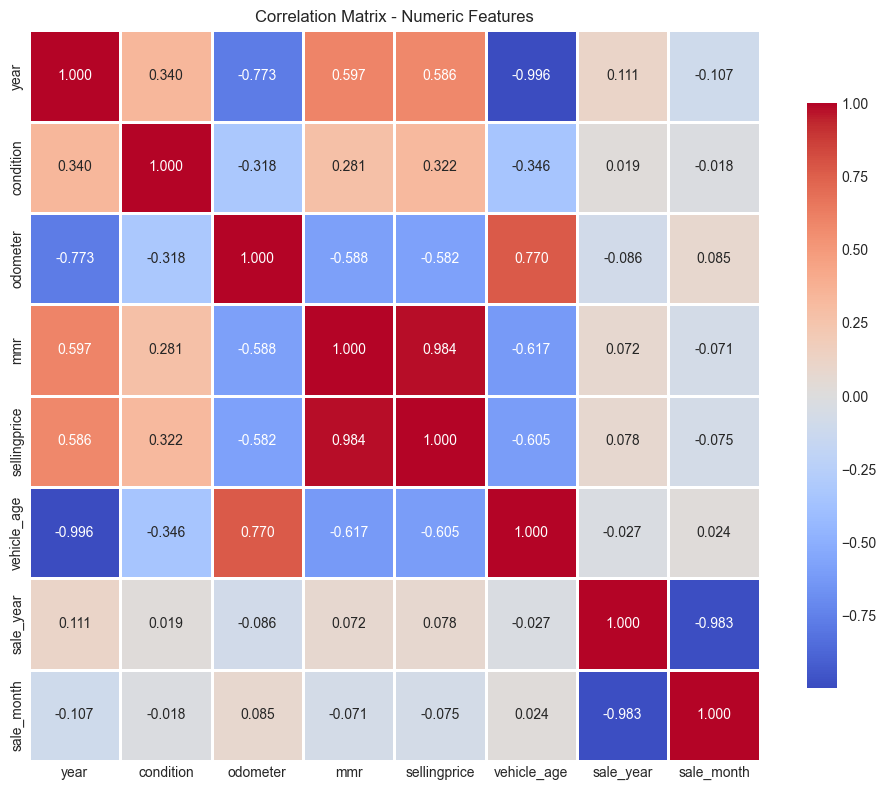

Correlations with Selling Price (sorted by absolute value):
mmr                 :  0.9836
vehicle_age         : -0.6047
year                :  0.5865
odometer            : -0.5824
condition           :  0.3219
sale_year           :  0.0782
sale_month          : -0.0754

Potential Multicollinearity (|correlation| > 0.7):
year            <-> odometer       : -0.7727
year            <-> vehicle_age    : -0.9964
odometer        <-> vehicle_age    :  0.7698
mmr             <-> sellingprice   :  0.9836
sale_year       <-> sale_month     : -0.9828


In [12]:
# Select numeric columns for correlation
numeric_features = ['year', 'condition', 'odometer', 'mmr', 'sellingprice', 
                    'vehicle_age', 'sale_year', 'sale_month']

# Calculate correlation matrix
corr_matrix = df_raw[numeric_features].corr()

# Create correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix - Numeric Features')
plt.tight_layout()
plt.show()

# Print key correlations with selling price
print("Correlations with Selling Price (sorted by absolute value):")
price_corr = corr_matrix['sellingprice'].drop('sellingprice').abs().sort_values(ascending=False)
for feature, corr_value in price_corr.items():
    actual_corr = corr_matrix.loc[feature, 'sellingprice']
    print(f"{feature:20s}: {actual_corr:7.4f}")

# Identify potential multicollinearity issues
print("\nPotential Multicollinearity (|correlation| > 0.7):")
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

for feat1, feat2, corr_val in high_corr:
    print(f"{feat1:15s} <-> {feat2:15s}: {corr_val:7.4f}")

## Step 12: Time Series Trends Analysis

Examine how selling prices and sales volume evolved over time.
Identify seasonal patterns and market trends during the 2014-2015 period.

Monthly Sales Statistics:
     Month   Count  Avg_Price  Median_Price  Avg_MMR  Avg_Odometer
0  2014-01     206   15555.95      15250.00 15589.81      47961.85
1  2014-02       1   10500.00      10500.00 11150.00      12154.00
2  2014-12   53520   11293.61       9600.00 11580.25      82610.85
3  2015-01  140609   13288.45      12000.00 13470.20      68967.51
4  2015-02  163052   13608.25      12200.00 13674.32      68611.42
5  2015-03   38101   13548.89      12400.00 13562.16      68979.69


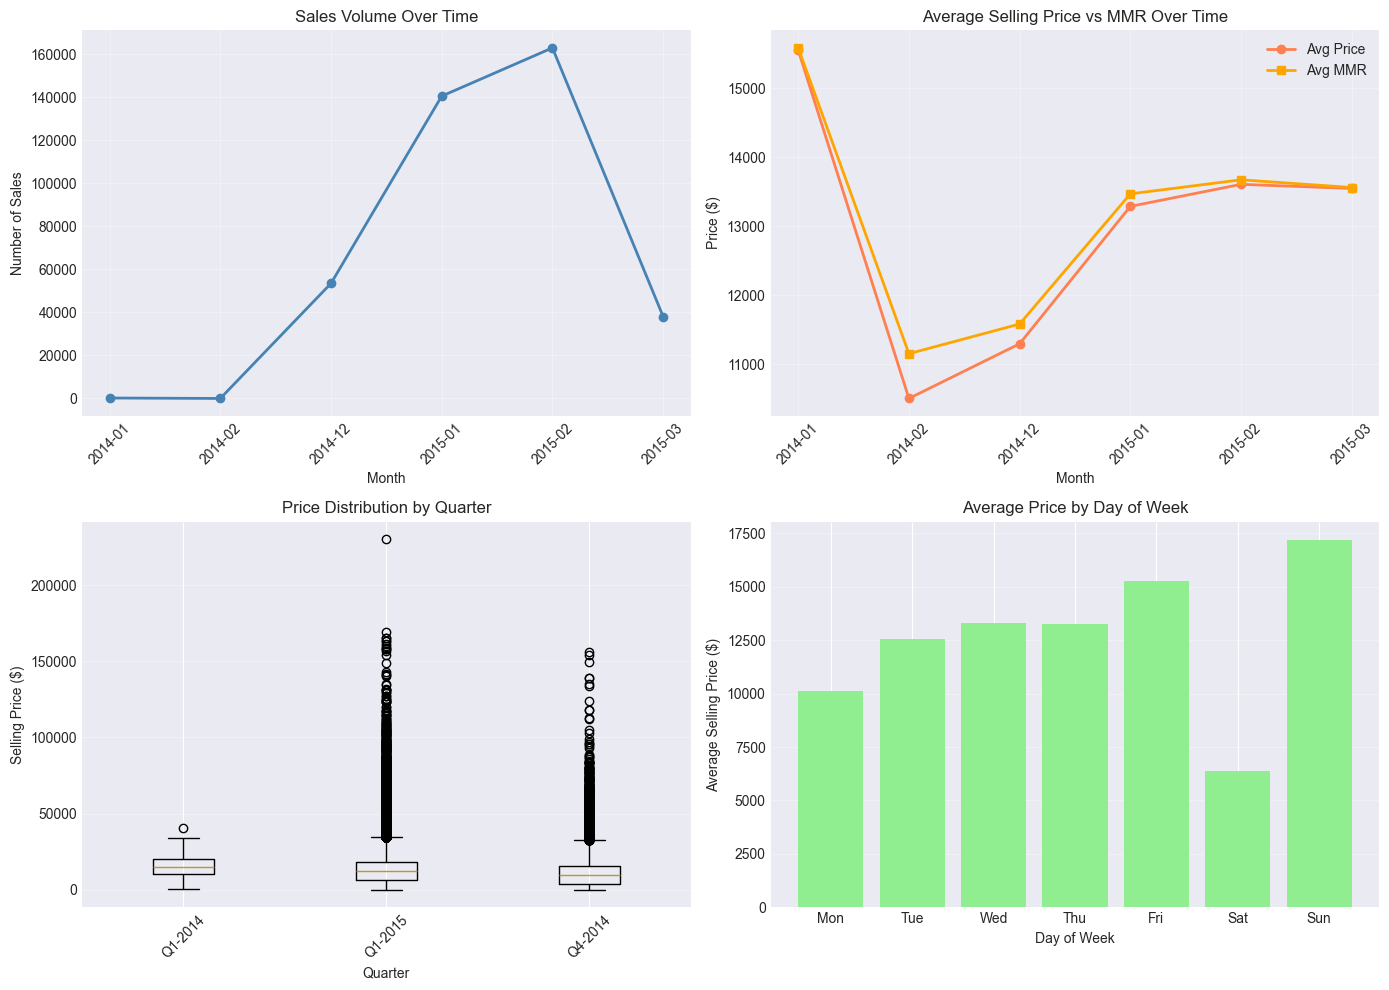


Day of Week Analysis:
Mon: 11360 sales, Avg Price: $10103.81
Tue: 116014 sales, Avg Price: $12538.52
Wed: 121480 sales, Avg Price: $13314.67
Thu: 107210 sales, Avg Price: $13271.41
Fri: 39301 sales, Avg Price: $15252.07
Sat: 6 sales, Avg Price: $6356.83
Sun: 118 sales, Avg Price: $17173.31


In [14]:
# Prepare time series data
ts_data = df_raw[df_raw['saledate'].notna()].copy()
ts_data['sale_month_year'] = ts_data['saledate'].dt.to_period('M')

# Monthly aggregations
monthly_stats = ts_data.groupby('sale_month_year').agg({
    'sellingprice': ['count', 'mean', 'median'],
    'mmr': 'mean',
    'odometer': 'mean'
}).reset_index()
monthly_stats.columns = ['Month', 'Count', 'Avg_Price', 'Median_Price', 'Avg_MMR', 'Avg_Odometer']
monthly_stats['Month'] = monthly_stats['Month'].astype(str)

print("Monthly Sales Statistics:")
print(monthly_stats)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sales volume over time
axes[0, 0].plot(monthly_stats['Month'], monthly_stats['Count'], marker='o', linewidth=2, color='steelblue')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Number of Sales')
axes[0, 0].set_title('Sales Volume Over Time')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Average price over time
axes[0, 1].plot(monthly_stats['Month'], monthly_stats['Avg_Price'], marker='o', linewidth=2, color='coral', label='Avg Price')
axes[0, 1].plot(monthly_stats['Month'], monthly_stats['Avg_MMR'], marker='s', linewidth=2, color='orange', label='Avg MMR')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].set_title('Average Selling Price vs MMR Over Time')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Price distribution by quarter
ts_data['sale_quarter_label'] = 'Q' + ts_data['sale_quarter'].astype(int).astype(str) + '-' + ts_data['sale_year'].astype(int).astype(str)
axes[1, 0].boxplot([ts_data[ts_data['sale_quarter_label'] == q]['sellingprice'].dropna() 
                     for q in sorted(ts_data['sale_quarter_label'].unique())], 
                    labels=sorted(ts_data['sale_quarter_label'].unique()))
axes[1, 0].set_xlabel('Quarter')
axes[1, 0].set_ylabel('Selling Price ($)')
axes[1, 0].set_title('Price Distribution by Quarter')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Day of week analysis (fixed)
dow_stats = ts_data.groupby('sale_dayofweek')['sellingprice'].agg(['count', 'mean']).reset_index()
dow_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[1, 1].bar(range(len(dow_stats)), dow_stats['mean'], color='lightgreen')
axes[1, 1].set_xticks(range(len(dow_stats)))
axes[1, 1].set_xticklabels([dow_labels[int(i)] for i in dow_stats['sale_dayofweek']])
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Average Selling Price ($)')
axes[1, 1].set_title('Average Price by Day of Week')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nDay of Week Analysis:")
for idx, row in dow_stats.iterrows():
    print(f"{dow_labels[int(row['sale_dayofweek'])]}: {row['count']:.0f} sales, Avg Price: ${row['mean']:.2f}")

## Step 13: Save Interim Dataset

Export the dataset with newly created features to the interim data directory.
This serves as the starting point for Notebook 01 data cleaning and preprocessing.

In [15]:
# Select columns to save
columns_to_save = [
    'year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
    'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice',
    'saledate', 'sale_year', 'sale_month', 'sale_day', 'sale_dayofweek', 
    'sale_quarter', 'vehicle_age', 'price_diff'
]

# Create interim dataset
df_interim = df_raw[columns_to_save].copy()

# Save to interim directory
interim_path = 'data/interim/car_prices_interim.csv'
df_interim.to_csv(interim_path, index=False)

print(f"Interim dataset saved successfully")
print(f"Location: {interim_path}")
print(f"Shape: {df_interim.shape}")
print(f"Columns saved: {len(columns_to_save)}")
print("\nColumn list:")
for i, col in enumerate(columns_to_save, 1):
    print(f"  {i:2d}. {col}")

# Summary statistics
print(f"\nData Quality Summary:")
print(f"Total records: {len(df_interim):,}")
print(f"Records with valid dates: {df_interim['saledate'].notna().sum():,}")
print(f"Complete cases (no missing): {df_interim.dropna().shape[0]:,}")
print(f"Overall completeness: {(1 - df_interim.isnull().sum().sum() / (len(df_interim) * len(df_interim.columns))) * 100:.2f}%")

Interim dataset saved successfully
Location: data/interim/car_prices_interim.csv
Shape: (558837, 23)
Columns saved: 23

Column list:
   1. year
   2. make
   3. model
   4. trim
   5. body
   6. transmission
   7. vin
   8. state
   9. condition
  10. odometer
  11. color
  12. interior
  13. seller
  14. mmr
  15. sellingprice
  16. saledate
  17. sale_year
  18. sale_month
  19. sale_day
  20. sale_dayofweek
  21. sale_quarter
  22. vehicle_age
  23. price_diff

Data Quality Summary:
Total records: 558,837
Records with valid dates: 395,489
Complete cases (no missing): 333,509
Overall completeness: 90.14%


## Step 14: EDA Summary Report

Consolidate key findings from the exploratory analysis to guide preprocessing decisions.
This report documents data quality issues and recommendations for Notebook 01.

In [16]:
print("=" * 80)
print("EXPLORATORY DATA ANALYSIS - SUMMARY REPORT")
print("=" * 80)

print("\n1. DATASET OVERVIEW")
print("-" * 80)
print(f"Total Records: {len(df_interim):,}")
print(f"Total Features: {df_interim.shape[1]}")
print(f"Date Range: {df_interim['saledate'].min()} to {df_interim['saledate'].max()}")
print(f"Target Variable: sellingprice (Mean: ${df_interim['sellingprice'].mean():,.2f})")

print("\n2. DATA QUALITY ISSUES IDENTIFIED")
print("-" * 80)
print("High Priority:")
print(f"  - Transmission: 11.69% missing + 26 invalid values ('sedan' misclassified)")
print(f"  - Body Type: Inconsistent capitalization (82 variations, e.g., 'Sedan' vs 'sedan')")
print(f"  - Duplicate VINs: 8,539 records (same vehicle sold multiple times)")
print("\nMedium Priority:")
print(f"  - Odometer: 81 extreme outliers (>500k miles)")
print(f"  - Condition: Scale appears to be 1-49 instead of expected 1-5")
print(f"  - Missing dates: 163,348 records (29.2%) have unparseable sale dates")
print("\nLow Priority:")
print(f"  - Model/Make: ~2% missing (can impute or drop)")
print(f"  - Price outliers: 7 records with >$50k difference from MMR")

print("\n3. KEY STATISTICAL FINDINGS")
print("-" * 80)
print(f"Price Correlation with MMR: 0.984 (extremely strong)")
print(f"Price Correlation with Odometer: -0.582 (moderate negative)")
print(f"Price Correlation with Vehicle Age: -0.605 (moderate negative)")
print(f"Median Vehicle Age: {df_interim['vehicle_age'].median():.0f} years")
print(f"Median Odometer: {df_interim['odometer'].median():,.0f} miles")
print(f"Average Price vs MMR Gap: ${df_interim['price_diff'].mean():,.2f} (auction discount)")

print("\n4. MARKET INSIGHTS")
print("-" * 80)
print("Top 5 Brands by Volume:")
for i, (make, count) in enumerate(df_raw['make'].value_counts().head(5).items(), 1):
    avg_price = df_raw[df_raw['make'] == make]['sellingprice'].mean()
    print(f"  {i}. {make}: {count:,} vehicles (Avg: ${avg_price:,.0f})")

print("\nTop 5 States by Volume:")
for i, (state, count) in enumerate(df_raw['state'].value_counts().head(5).items(), 1):
    print(f"  {i}. {state.upper()}: {count:,} vehicles")

print("\nBody Type Distribution:")
body_clean = df_raw['body'].str.lower().value_counts().head(5)
for i, (body, count) in enumerate(body_clean.items(), 1):
    print(f"  {i}. {body.title()}: {count:,} vehicles")

print("\n5. RECOMMENDATIONS FOR NOTEBOOK 01")
print("-" * 80)
print("Data Cleaning Priorities:")
print("  1. Standardize body type capitalization (convert all to title case)")
print("  2. Fix transmission values (remove 'sedan' entries)")
print("  3. Handle odometer outliers (cap at 500k or remove)")
print("  4. Address multicollinearity (drop 'year' in favor of 'vehicle_age')")
print("  5. Handle missing values (imputation strategy by feature type)")
print("  6. Consider removing records with missing sale dates if not needed")
print("\nFeature Engineering Priorities:")
print("  1. Log-transform odometer (follows log-normal distribution)")
print("  2. Create price bins for stratified analysis")
print("  3. Encode high-cardinality categoricals (make, model, seller)")
print("  4. Create regional groupings from state variable")
print("  5. Consider interaction terms (age × odometer, make × body)")

print("\n6. VALIDATION CHECKS PASSED")
print("-" * 80)
print(f"  Year range (1980-2016): PASS")
print(f"  Vehicle age reasonable (<-2 years): PASS")
print(f"  No negative prices: PASS")
print(f"  Strong MMR-price correlation: PASS")

print("\n" + "=" * 80)
print("END OF NOTEBOOK 00")
print("=" * 80)
print("\nNext Step: Proceed to Notebook 01 - Data Cleaning + Preprocessing Pipeline")

EXPLORATORY DATA ANALYSIS - SUMMARY REPORT

1. DATASET OVERVIEW
--------------------------------------------------------------------------------
Total Records: 558,837
Total Features: 23
Date Range: 2014-01-01 09:15:00+08:00 to 2015-03-06 07:00:00+08:00
Target Variable: sellingprice (Mean: $13,611.36)

2. DATA QUALITY ISSUES IDENTIFIED
--------------------------------------------------------------------------------
High Priority:
  - Transmission: 11.69% missing + 26 invalid values ('sedan' misclassified)
  - Body Type: Inconsistent capitalization (82 variations, e.g., 'Sedan' vs 'sedan')
  - Duplicate VINs: 8,539 records (same vehicle sold multiple times)

Medium Priority:
  - Odometer: 81 extreme outliers (>500k miles)
  - Condition: Scale appears to be 1-49 instead of expected 1-5
  - Missing dates: 163,348 records (29.2%) have unparseable sale dates

Low Priority:
  - Model/Make: ~2% missing (can impute or drop)
  - Price outliers: 7 records with >$50k difference from MMR

3. KEY S